In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
from astropy.io import fits
hdul = fits.open('tractor-0001m002.fits')

In [3]:
cat=hdul[1].data

In [4]:
ra=cat['ra']
dec=cat['dec']
mjd_min=cat['mjd_min']
mjd_max=cat['mjd_max']
flux_z=cat['flux_z']


lc_flux_w1=cat['lc_flux_w1'] # ! there is a lightcurve here
lc_flux_ivar_w1=cat['lc_flux_ivar_w1'] # this is the variance of the lc measurements
lc_mjd_w1=cat['lc_mjd_w1'] # here are the time moments of the LC


flux_z_var=cat['flux_ivar_z']
Nsources=len(ra)
print(Nsources)
for i in range(Nsources):
    if(ra[i]>300):
        ra[i]=ra[i]-360

1849


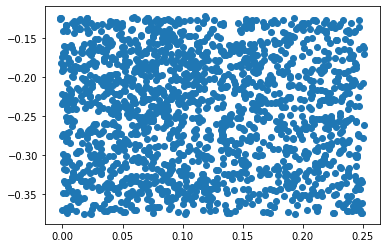

In [5]:
plt.scatter(ra,dec)

(array([[0.        , 1.68289173, 0.        , ..., 0.        , 4.93550062,
         2.95428014],
        [0.        , 2.24774647, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.64423847, 0.        , 1.38961542, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 3.98653698, ..., 0.        , 0.        ,
         0.        ],
        [2.78999639, 4.10588837, 2.38251662, ..., 0.        , 3.84304619,
         0.        ],
        [3.05718327, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-0.0020323 ,  0.0005014 ,  0.00303509,  0.00556879,  0.00810248,
         0.01063618,  0.01316987,  0.01570357,  0.01823727,  0.02077096,
         0.02330466,  0.02583835,  0.02837205,  0.03090575,  0.03343944,
         0.03597314,  0.03850683,  0.04104053,  0.04357422,  0.04610792,
         0.04864162,  0.05117531,  0.05370901,  0.0562427 ,  0.0587764 ,
         0.06131009,  0.06384379,  0.0663774

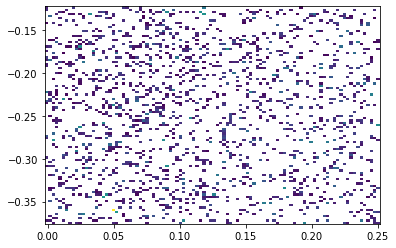

In [6]:
from matplotlib.colors import LogNorm

plt.hist2d(ra, dec,weights=flux_z,bins=(100),norm=LogNorm())